<a href="https://colab.research.google.com/github/deepsignal/Spatial-Processing/blob/master/map_flow3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# 3_2 : configuring to plot only the combos that have been assigned by the assigner.

# plot some custom figures from 3.0 notebook, with point removal and stuff.
# Stremaline the custom assignment, after combo number inference, to try different distance mechanisms.

In [ ]:

# End to end flow, with matching and cartezianization from assigned file data
# Assigned file to combos and links
# User above to create an assignment cost function graph
# Find the floor of the graph to select the number of combos
# Use combos to create a data stream, to be fed for counting function
# Use counting output, and assignment labels for actual plotted points

In [ ]:
! pip install ortools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 28.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
#drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import json
import numpy as np
from collections import OrderedDict

np.set_printoptions(suppress=True)
np.set_printoptions(linewidth=np.inf)
np.set_printoptions(precision=2)


#copied_path = '/content/gdrive/MyDrive/combo_files/nlp_format_adriandevice.json'
#copied_path = '/content/gdrive/MyDrive/5db8f4ebbca6fe4cba7f6543_20221112_163300_20221112_164300_reassign.json' # taj single walkthru 5 min
#copied_path = '/content/gdrive/MyDrive/dt_demoday_live_data_reassign.json' # DT_demo Steven Uhoto
#copied_path = '/content/gdrive/MyDrive/6452b546a0f1e8000a2932f3_20230528_000000_20230528_235959_reassign.json' # Wills comcast test 5+ devices-fullday 28
#copied_path = '/content/gdrive/MyDrive/6452b546a0f1e8000a2932f3_20230527_000000_20230527_235959_reassign.json' # Wills comcast test 5+ devices-fullday 27
#copied_path = '/content/gdrive/MyDrive/6452b546a0f1e8000a2932f3_20230519_000000_20230519_235959_reassign.json' # Wills comcast test 5+ devices-fullday 19
#copied_path = '/content/gdrive/MyDrive/6452b546a0f1e8000a2932f3_20230518_000000_20230518_235959_reassign.json' # Wills comcast test 5+ devices-fullday 18
#copied_path = '/content/gdrive/MyDrive/6452b546a0f1e8000a2932f3_20230517_000000_20230517_235959_reassign.json' # Wills comcast test 5+ devices-fullday 17
#copied_path = '/content/gdrive/MyDrive/taj_fullday_5db8f4ebbca6fe4cba7f6543_20221106_000000_20221106_230000_reassign.json'    # taj full dat
# +++ Adding another user
#copied_path = '/content/gdrive/MyDrive/61b0f2ef11a28b18306f3cee_20230609_000000_20230609_235959_reassign.json' # Matts 06_09 data
#copied_path = '/content/gdrive/MyDrive/61b0f2ef11a28b18306f3cee_20230610_000000_20230610_235959_reassign.json' # Matts 06_09 data
#++ Adding live data test
copied_path = '/content/gdrive/MyDrive/live_data_26_jun_reassign.json' # 26th June Test

with open(copied_path) as f:
  compress_data = json.load(f)

#print(len(compress_data["max_topology"]))
# 21

In [ ]:
combo_dict = {} # OrderedDict()
for i in range(30):
  k = compress_data['topo1']['transition_info']['Combo'+str(i+1)] #['links']
  #print('Combo'+str(i+1)+'::',k['links'], '<<<>>>', k['location'])
  print('Combo'+str(i+1)+'::',k['links'])
  combo_dict['Combo'+str(i+1)] = k['links']

Combo1:: ['00B8C2D810A2.00f620736c8f', '00B8C2D810A2.7cd95c14983f', '00B8C2D810A2.7cd95c216920', '00B8C2D810A2.d88c79432998', '00B8C2D810A2.e4f0421e25cd']
Combo2:: ['00B8C2D810A2.689a8731fc6b']
Combo3:: ['00B8C2D810A2.00f6207af8b4']
Combo4:: ['00B8C2D810A2.00f620736c8f', '00B8C2D810A2.7cd95c14983f', '00B8C2D810A2.7cd95c216920', '00B8C2D810A2.ac67841c5beb', '00B8C2D810A2.d88c79432998', '00B8C2D810A2.e4f0421e25cd']
Combo5:: ['00B8C2D810A2.00f620736c8f', '00B8C2D810A2.00f6207af8b4', '00B8C2D810A2.7cd95c14983f', '00B8C2D810A2.7cd95c216920', '00B8C2D810A2.d88c79432998', '00B8C2D810A2.e4f0421e25cd']
Combo6:: ['00B8C2D810A2.ac67841c5beb']
Combo7:: ['00B8C2D810A2.00f620736c8f', '00B8C2D810A2.7cd95c14983f', '00B8C2D810A2.7cd95c216920', '00B8C2D810A2.e4f0421e25cd']
Combo8:: ['00B8C2D810A2.00f620736c8f', '00B8C2D810A2.7cd95c216920']
Combo9:: ['00B8C2D810A2.e4f0421e25cd']
Combo10:: ['00B8C2D810A2.7cd95c216920']
Combo11:: ['00B8C2D810A2.ccf735202154']
Combo12:: ['00B8C2D810A2.7cd95c14983f', '00B8C2

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
from ortools.linear_solver import pywraplp

import sys
sys.path.append('/content/gdrive/My Drive')

from MatchingTools import match_devices

In [ ]:
def adapter(combos, links):
    """
    combos: Dictionary mapping combo name to list of names of active links
    links: list of link names
    """

    # construct cluster center tokens
    linkname2linkidx = {}
    for i, l in enumerate(links):
        linkname2linkidx[l] = i

    cluster_centers = [] # when populated, should have the same length as combos
    for _, active_links in combos.items():
        active_idxs = [linkname2linkidx[l] for l in active_links]
        # construct token from active_idxs. Token should be the same length as links
        center_token = tuple(1 if i in active_idxs else 0 for i in range(len(links)))
        cluster_centers.append(center_token)

    return cluster_centers


In [ ]:
links = compress_data['topo1']['topology']
combos = combo_dict


centers = adapter(combo_dict, links)
match_devices(centers, links)
#print(centers)

Total cost = 4.0
Device 00B8C2D810A2 assigned to cluster center (1, 1, 0, 0, 1, 1, 1, 0, 1, 1). Cost: 3.0
Device 00f620736c8f assigned to cluster center (1, 0, 0, 0, 0, 0, 0, 0, 0, 0). Cost: 0.0
Device 00f6207af8b4 assigned to cluster center (0, 1, 0, 0, 0, 0, 0, 0, 0, 0). Cost: 0.0
Device 30fd38a4c46f assigned to cluster center (0, 0, 1, 0, 0, 0, 0, 0, 0, 0). Cost: 0.0
Device 689a8731fc6b assigned to cluster center (0, 0, 0, 1, 0, 0, 0, 0, 0, 0). Cost: 0.0
Device 7cd95c14983f assigned to cluster center (0, 0, 0, 0, 1, 0, 0, 0, 1, 0). Cost: 1.0
Device 7cd95c216920 assigned to cluster center (0, 0, 0, 0, 0, 1, 0, 0, 0, 0). Cost: 0.0
Device ac67841c5beb assigned to cluster center (0, 0, 0, 0, 0, 0, 1, 0, 0, 0). Cost: 0.0
Device ccf735202154 assigned to cluster center (0, 0, 0, 0, 0, 0, 0, 1, 0, 0). Cost: 0.0
Device d88c79432998 assigned to cluster center (0, 0, 0, 0, 0, 0, 0, 0, 1, 0). Cost: 0.0
Device e4f0421e25cd assigned to cluster center (0, 0, 0, 0, 0, 0, 0, 0, 0, 1). Cost: 0.0



('Total cost = 4.0\nDevice 00B8C2D810A2 assigned to cluster center (1, 1, 0, 0, 1, 1, 1, 0, 1, 1). Cost: 3.0\nDevice 00f620736c8f assigned to cluster center (1, 0, 0, 0, 0, 0, 0, 0, 0, 0). Cost: 0.0\nDevice 00f6207af8b4 assigned to cluster center (0, 1, 0, 0, 0, 0, 0, 0, 0, 0). Cost: 0.0\nDevice 30fd38a4c46f assigned to cluster center (0, 0, 1, 0, 0, 0, 0, 0, 0, 0). Cost: 0.0\nDevice 689a8731fc6b assigned to cluster center (0, 0, 0, 1, 0, 0, 0, 0, 0, 0). Cost: 0.0\nDevice 7cd95c14983f assigned to cluster center (0, 0, 0, 0, 1, 0, 0, 0, 1, 0). Cost: 1.0\nDevice 7cd95c216920 assigned to cluster center (0, 0, 0, 0, 0, 1, 0, 0, 0, 0). Cost: 0.0\nDevice ac67841c5beb assigned to cluster center (0, 0, 0, 0, 0, 0, 1, 0, 0, 0). Cost: 0.0\nDevice ccf735202154 assigned to cluster center (0, 0, 0, 0, 0, 0, 0, 1, 0, 0). Cost: 0.0\nDevice d88c79432998 assigned to cluster center (0, 0, 0, 0, 0, 0, 0, 0, 1, 0). Cost: 0.0\nDevice e4f0421e25cd assigned to cluster center (0, 0, 0, 0, 0, 0, 0, 0, 0, 1). C

In [ ]:
from contextlib import redirect_stdout
import io

In [ ]:
# iterate the number of combos to take in, and plot the matching score over # of combos
# select the settling point where the cost has flattened

score = []
for k in range(2,32):
  combos_prep = {'Combo'+str(i):combos['Combo'+str(i)] for i in range(1,k)}
  #print(combos_prep)
  centers = adapter(combos_prep, links)
  # r->results, c->costs, a->assignments, d->devices
  #test_matching(centers, links)
  with redirect_stdout(io.StringIO()) as f:
    r,c,a,d = match_devices(centers, links)
    score.append(c)

In [ ]:
# CNC: combo number corner ... Find innitial zeros. Start from when they end. keep moving, until three consecutive same
# costs are encountered.
stop_cnc = 0
floor_th = 2
combo_result = 0
for i in range(20):
  if score[i]==0:
    pass
  else:
    if score[i-1]==score[i]:
      stop_cnc = stop_cnc + 1
  if stop_cnc == floor_th :
    print(str(i-(floor_th-1))+'  is the corner of the score card')
    combo_result = i-(floor_th-1)
    stop_cnc = 0
    break
    #stop_cnc = 0
  #if i>10 and score[i]==0:
  #  combo_result = i-1
  #  print(str(combo_result)+ 'is the new corner'  )
  #  exit



15  is the corner of the score card


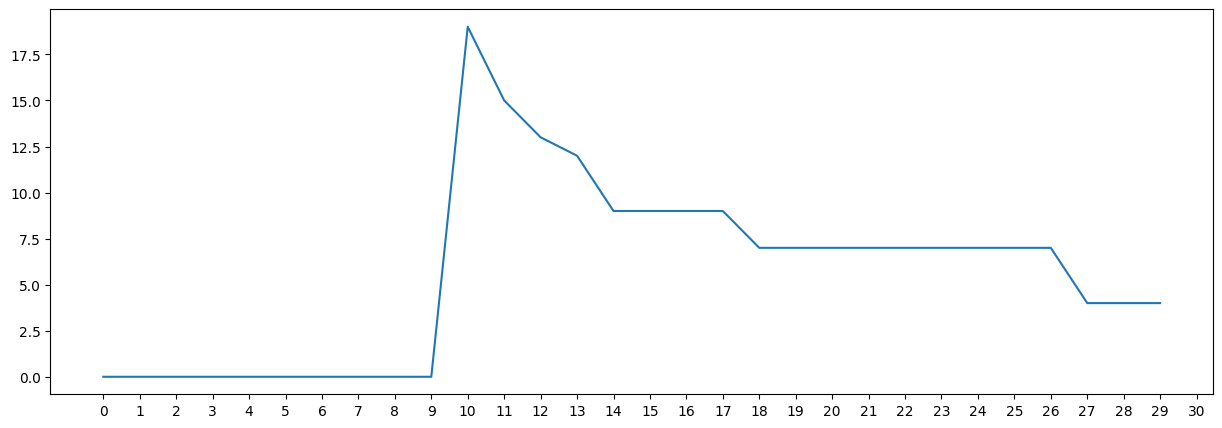

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15,5))


plt.xticks(np.arange(0, 32, 1))
plt.plot(score)

This gets input to the number of combos, which can be forced in the box below

In [ ]:
combo_result = 14

In [ ]:
# creating combo to mac assigner using mixed interger prog

k = combo_result
combos_prep = {'Combo'+str(i):combos['Combo'+str(i)] for i in range(1,k)}
centers = adapter(combos_prep, links)
# r->results, c->costs, a->assignments, d->devices
#test_matching(centers, links)
r,c,a,d = match_devices(centers, links)
print(a)

# creating combo to devices dictionatry
combo_mac = OrderedDict()
for i in range(len(a)):
  print(a[i])
  combo_mac[d[i]] = 'Combo'+str(a[i][1]+1)
print(combo_mac)

Total cost = 13.0
Device 00B8C2D810A2 assigned to cluster center (1, 0, 0, 0, 1, 1, 1, 0, 1, 1). Cost: 4.0
Device 00f620736c8f assigned to cluster center (1, 0, 0, 0, 0, 1, 0, 0, 0, 1). Cost: 2.0
Device 00f6207af8b4 assigned to cluster center (0, 1, 0, 0, 0, 0, 0, 0, 0, 0). Cost: 0.0
Device 30fd38a4c46f assigned to cluster center (0, 0, 0, 0, 0, 1, 0, 0, 0, 0). Cost: 2.0
Device 689a8731fc6b assigned to cluster center (0, 0, 0, 1, 0, 0, 0, 0, 0, 0). Cost: 0.0
Device 7cd95c14983f assigned to cluster center (1, 0, 0, 0, 1, 1, 0, 0, 0, 1). Cost: 3.0
Device 7cd95c216920 assigned to cluster center (1, 0, 0, 0, 0, 1, 0, 0, 0, 0). Cost: 1.0
Device ac67841c5beb assigned to cluster center (0, 0, 0, 0, 0, 0, 1, 0, 0, 0). Cost: 0.0
Device ccf735202154 assigned to cluster center (0, 0, 0, 0, 0, 0, 0, 1, 0, 0). Cost: 0.0
Device d88c79432998 assigned to cluster center (0, 0, 0, 0, 1, 0, 0, 0, 1, 0). Cost: 1.0
Device e4f0421e25cd assigned to cluster center (0, 0, 0, 0, 0, 0, 0, 0, 0, 1). Cost: 0.0

[(

In [ ]:
# jig up a new assigner here, Esp for star topologies
num_combos2try = combo_result
links = compress_data['topo1']['topology']
link_count  = []
for i in range(len(links)):
  link_count.append(0)

# link frequencies from appearance in combos
for i in range(len(links)):
  for j in range(num_combos2try):
    if links[i] in combo_dict['Combo'+str(j+1)]:
      link_count[i] = link_count[i]+1
      #print(link_count)

#for i in combo_dict:
print(link_count)
print(links)

assign_dict = {}
assigned_links = []
for i in range(num_combos2try):
  if len(combo_dict['Combo'+str(i+1)])==1:
    combo2b = combo_dict['Combo'+str(i+1)]
    #print(combo2b)
    assigned_links.append(combo2b[0])
    assign_dict['Combo'+str(i+1)] = combo2b[0].split('.')[1]

print(assign_dict)
# assuming # of devices > 3
# assigning for two link combos
for i in range(num_combos2try):
  if len(combo_dict['Combo'+str(i+1)])==2:
    combo2b = combo_dict['Combo'+str(i+1)]
    #print(combo2b)
    new_link = set(combo2b) - set(assigned_links)
    #print(new_link, 'extra link')
    # assign the new link, todo
    if len(new_link)>0:
      link2b = list(new_link)
      print(link2b,  'extra link discovered')
      assign_dict['Combo'+str(i+1)] = link2b[0].split('.')[1]
      assigned_links.append(link2b[0])
# assigning for three link combos
for i in range(num_combos2try):
  if len(combo_dict['Combo'+str(i+1)])==3:
    combo2b = combo_dict['Combo'+str(i+1)]
    #print(combo2b)
    new_link = set(combo2b) - set(assigned_links)
    #print(new_link, 'extra link')
    # assign the new link, todo
    if len(new_link)==1:
      link2b = list(new_link)
      print(link2b,  'extra link discovered')
      assign_dict['Combo'+str(i+1)] = link2b[0].split('.')[1]
    # if len(new_link) > 1: use the less weighted link for assignment


# assigning for node
max_len = 0
max_combo =1

for i in range(num_combos2try):
  curr_len = len(combo_dict['Combo'+str(i+1)])
  #print(curr_len)
  #print(i)
  if curr_len>max_len and curr_len>3:
    #print(curr_len)
    max_len = curr_len
    max_combo = i+1


assign_dict['Combo'+str(max_combo)] = combo_dict['Combo'+str(1)][0].split('.')[0]

print(assign_dict)
print(max_combo)

[7, 3, 0, 1, 6, 8, 3, 1, 5, 7]
['00B8C2D810A2.00f620736c8f', '00B8C2D810A2.00f6207af8b4', '00B8C2D810A2.30fd38a4c46f', '00B8C2D810A2.689a8731fc6b', '00B8C2D810A2.7cd95c14983f', '00B8C2D810A2.7cd95c216920', '00B8C2D810A2.ac67841c5beb', '00B8C2D810A2.ccf735202154', '00B8C2D810A2.d88c79432998', '00B8C2D810A2.e4f0421e25cd']
{'Combo2': '689a8731fc6b', 'Combo3': '00f6207af8b4', 'Combo6': 'ac67841c5beb', 'Combo9': 'e4f0421e25cd', 'Combo10': '7cd95c216920', 'Combo11': 'ccf735202154'}
['00B8C2D810A2.00f620736c8f'] extra link discovered
['00B8C2D810A2.7cd95c14983f', '00B8C2D810A2.d88c79432998'] extra link discovered
{'Combo2': '689a8731fc6b', 'Combo3': '00f6207af8b4', 'Combo6': 'ac67841c5beb', 'Combo9': 'e4f0421e25cd', 'Combo10': '7cd95c216920', 'Combo11': 'ccf735202154', 'Combo8': '00f620736c8f', 'Combo12': '7cd95c14983f', 'Combo14': '00B8C2D810A2'}
14


In [ ]:
data1 = compress_data['topo1']['combo_sequence']

# filter the time series using only selected combos
data2 = []
top_combos = num_combos2try #11 #12  # replace with a list of selections
selected_combos = [i+1 for i in range(top_combos)]
for i in data1:
  if i in selected_combos:
    data2.append(i)

print(data2)

[10, 10, 8, 8, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 6, 6, 6, 6, 6, 6, 6, 6, 10, 10, 13, 5, 5, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 10, 10, 6, 6, 6, 6, 6, 6, 6, 11, 11, 11, 11, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 7, 1, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 14, 14, 4, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 7, 10, 4, 4, 4, 4, 4, 4, 1, 14, 14, 5, 14, 14, 14, 14, 5, 14, 14, 14, 14, 4, 1, 5, 14, 14, 5, 14, 1, 4, 4, 4, 1, 1, 5, 1, 5, 5, 5, 5, 1, 1, 1, 7, 7, 7, 8, 8, 5, 5, 5, 5, 14, 14, 14, 14, 14, 1, 13, 13, 13, 13, 1, 1, 10, 10, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 5, 5, 5, 5, 1, 1, 7, 7, 5, 1, 1, 7, 8, 7, 1, 5, 5, 5, 5, 5, 7, 1, 7, 7, 7, 7, 7, 13, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 13, 1, 

In [ ]:
def remove_non_consecutive(tokens):
    # Remove tokens that don't have consecutive occurrences
    filtered_tokens = []
    for i in range(len(tokens)):
        current_token = tokens[i]
        if i == 0 or i == 1 or i == len(tokens) - 1 or i == len(tokens) - 2:  # setup a window of 4 vs two tokens
            filtered_tokens.append(current_token)
        else:
            prev_token  = tokens[i - 1]
            prev_token2 = tokens[i - 2]
            next_token  = tokens[i + 1]
            next_token2  = tokens[i + 2]
            if prev_token2 == current_token or next_token2 == current_token:
                filtered_tokens.append(current_token)

    return filtered_tokens

In [ ]:
data3 = remove_non_consecutive(data2)
print(data3)

[10, 10, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 10, 6, 6, 6, 6, 6, 6, 6, 11, 11, 11, 11, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 4, 4, 1, 5, 1, 5, 5, 5, 5, 1, 1, 7, 7, 5, 5, 5, 5, 14, 14, 14, 14, 14, 13, 13, 13, 13, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 13, 13, 13, 1, 1, 1, 1, 10, 10, 10, 10, 10, 10, 10, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 

In [ ]:
# Example transition matrix creation

data = [3, 0, 1, 3, 2, 6, 5, 4, 7, 5, 4]
n = 11  # (this means there are 8 states in Markov chain from 0 - 7, both inclusive)
step = 1

def compute_transition_matrix(data, n, step = 1):
    P = np.zeros((n, n))
    T = np.zeros((n,n))
    m = len(data)
    for i in range(1,m):
        initial, final = i, i+ step
        if final < m:
            P[data[initial]-1][data[final]-1] += 1 # adjust for Combo1 naming
            T[data[initial]-1][data[final]-1] += 1

    #np.fill_diagonal(P, 2) # to reduce frequency effect
    np.fill_diagonal(P, 0) # to reduce frequency effect
    #np.fill_diagonal(P, np.sum(P, axis=1)) #
    sums = np.sum(P, axis = 1)
    for i in range(n):
        for j in range(n):
            P[i][j] = P[i][j] / sums[i]
            #P[i][j] = P[i][j]
    np.fill_diagonal(P, 0.01) # to reduce frequency effect
    return P,T

#print(compute_transition_matrix([3, 0, 1, 3, 2, 6, 5, 4, 7, 5, 4], 8, 1))

In [ ]:
# Example transition matrix creation with a window

data = [3, 0, 1, 3, 2, 6, 5, 4, 7, 5, 4]
n = 11  # (this means there are 8 states in Markov chain from 0 - 7, both inclusive)
step = 1

def compute_transition_matrix_wwin(data, n, step = 3):
    P = np.zeros((n, n))
    T = np.zeros((n,n))
    m = len(data)
    for i in range(1,m):
      for j in range(1,step):
        initial, final = i, i+j
        if final < m:
            P[data[initial]-1][data[final]-1] += 1 # adjust for Combo1 naming
            T[data[initial]-1][data[final]-1] += 1

    #np.fill_diagonal(P, 2) # to reduce frequency effect
    np.fill_diagonal(P, 0) # to reduce frequency effect
    #np.fill_diagonal(P, np.sum(P, axis=1)) #
    sums = np.sum(P, axis = 1)
    for i in range(n):
        for j in range(n):
            P[i][j] = P[i][j] / sums[i]
            #P[i][j] = P[i][j]
    np.fill_diagonal(P, 0.01) # to reduce frequency effect
    return P,T

#print(compute_transition_matrix([3, 0, 1, 3, 2, 6, 5, 4, 7, 5, 4], 8, 1))

In [ ]:
tr_mat,count_mat = compute_transition_matrix(data3, top_combos, step = 1)
print(count_mat)
print(tr_mat)

M_2_sym = tr_mat


[[119.   0.   0.   6.   6.   2.   2.   0.   0.   2.   0.   0.   1.   0.]
 [  0. 149.   0.   0.   0.   2.   0.   0.   2.   0.   0.   1.   0.   0.]
 [  0.   0. 133.   2.   2.   2.   0.   0.   0.   0.   0.   0.   1.   0.]
 [  5.   0.   3. 105.   2.   1.   1.   0.   0.   0.   0.   0.   0.   2.]
 [  7.   0.   1.   0.  96.   1.   3.   2.   0.   0.   0.   0.   0.   1.]
 [  1.   3.   3.   2.   1. 103.   0.   0.   0.   0.   6.   0.   0.   0.]
 [  2.   0.   0.   0.   2.   1.  24.   1.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.   1.   0.   0.  31.   0.   2.   0.   0.   0.   0.]
 [  0.   2.   0.   0.   0.   0.   0.   0.  31.   0.   0.   1.   0.   0.]
 [  1.   0.   0.   1.   0.   1.   1.   0.   0.  18.   0.   0.   1.   0.]
 [  0.   0.   0.   1.   0.   5.   0.   0.   0.   0.  27.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   1.   0.   0.  28.   0.   0.]
 [  3.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   8.   0.]
 [  0.   0.   0.   1.   1.   0.   0.   0.   0.   0.

<BarContainer object of 14 artists>

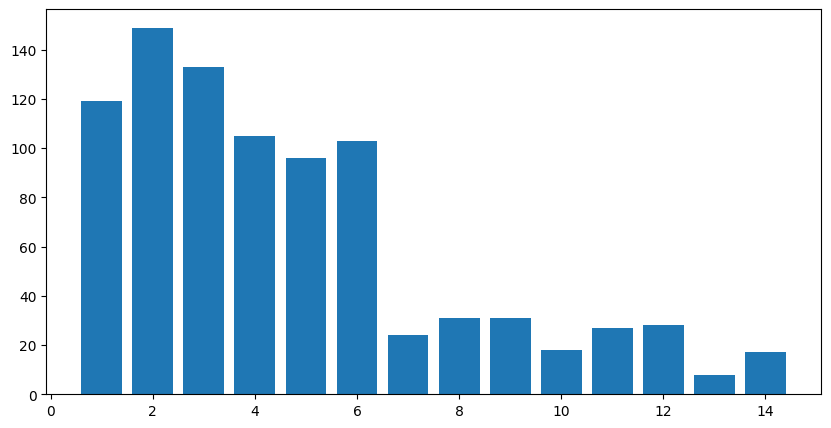

In [ ]:
#np.diag(count_mat)
plt.figure(figsize=(10,5))
plt.bar(range(1,len(tr_mat)+1),np.diag(count_mat))

In [ ]:
# Use the probability matrix, and run markov chains over it,
# to convert it into a distance between the nodes

from numpy import inf
import copy

markov_matn = tr_mat

mat_dim = len(markov_matn) # len(data[0].items())
M_2 = np.zeros((mat_dim,mat_dim))
for k in range(mat_dim):
    # loop for setting start node
    a = np.zeros(mat_dim) #np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    a[k]=1
    a_evolve = []
    a_evolve1 = []
    a_step = copy.deepcopy(a)
    for i in range(30):
        #a_step = a_step.dot(markov_matn) # just propagation
        lambda1 = 0.7
        a_step = (a*lambda1) + ((1-lambda1)*a_step.dot((markov_matn))) # flippping to the start+propagation
        a_step = a_step/sum(a_step)
        #print(a)
        #print(a_step)

    a_step[k]=0
    #print(a_step)
    M_2[k][:]= copy.deepcopy(1/a_step)
    M_2[k][k] = 1

#print(M_2)

<ipython-input-30-0e2ead164d79>:28: RuntimeWarning: divide by zero encountered in true_divide
  M_2[k][:]= copy.deepcopy(1/a_step)


In [ ]:
M_2_sym = M_2 + np.transpose(M_2)
print(np.round(M_2_sym))

[[    2.   909.   163.    25.    22.    79.    45.   270.  5405.    57.   392.  8039.    72.   240.]
 [  909.     2.   426.   880.  1092.    34.  3075.  8906.    17.  8759.   184.    54.  4819.  6643.]
 [  163.   426.     2.    35.    74.    38.   382.   664.  2499.   851.   207.  3666.   215.   372.]
 [   25.   880.    35.     2.    86.    66.   125.   428.  5844.   316.   373.  9526.   143.    44.]
 [   22.  1092.    74.    86.     2.    89.    35.    46.  6808.   173.   512. 10553.   200.    79.]
 [   79.    34.    38.    66.    89.     2.   378.  1090.   213.  1151.    18.   332.   497.   661.]
 [   45.  3075.   382.   125.    35.   378.     2.   101. 11824.   130.   803.  8664.   149.   624.]
 [  270.  8906.   664.   428.    46.  1090.   101.     2. 34450.   397.  3276. 25687.   934.   777.]
 [ 5405.    17.  2499.  5844.  6808.   213. 11824. 34450.     2. 29244.  1003.    21. 24059. 34549.]
 [   57.  8759.   851.   316.   173.  1151.   130.   397. 29244.     2.  2751. 11971.   200

In [ ]:
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.manifold import SpectralEmbedding

import warnings
warnings.filterwarnings('ignore')


#methods['LLE'] = LLE(method='standard')
#methods['LTSA'] = LLE(method='ltsa')
#methods['Hessian LLE'] = LLE(method='hessian')
##methods['Modified LLE'] = LLE(method='modified')
#methods['Isomap'] = manifold.Isomap(n_neighbors, n_components)
#methods['MDS'] = manifold.MDS(n_components, max_iter=100, n_init=1)
#methods['SE'] = manifold.SpectralEmbedding(n_components=n_components,
#                                           n_neighbors=n_neighbors)
#methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
#                                 random_state=0)


#mds = MDS(2,metric=False, random_state=7,dissimilarity='precomputed',normalized_stress=True,n_init=20) # produces stress of 0,21
mds = MDS(2,metric=False, random_state=3,dissimilarity='precomputed',normalized_stress=True,n_init=50,eps=0.0001)
#mds = MDS(2,metric=True, random_state=0,dissimilarity='precomputed')
X_2d = mds.fit_transform((M_2_sym))  # trying anothor distance type

embedding = LocallyLinearEmbedding(n_components=2, n_neighbors=5)
#embedding = SpectralEmbedding(n_components=2,n_neighbors=3)

#embedding = Isomap(n_components=2, n_neighbors=5)
#X_2d = embedding.fit_transform((M_2_sym))
#X_2d = embedding.fit_transform((tr_mat))

In [ ]:
mds.stress_

0.10043384294212925

In [ ]:
# preparing a dictionary of nodes
from collections import OrderedDict
node_dict=OrderedDict()
node_labels = OrderedDict()

#
len_data = X_2d.shape[0] #len(data_transition.keys())
for i in range(len_data):
    #print(i)
    comboname='Combo'+str(i)   #
    combo_loc = compress_data['topo1']['transition_info']['Combo'+str(i+1)]['location']
    #print(combo_loc)
    node_dict['Combo'+str(i+1)]=X_2d[i]
    #node_labels['Combo'+str(i+1)]= '\n\n'+combo_loc.split(':')[0] # changing to new assign dict
    if 'Combo'+str(i+1) in assign_dict and len(assign_dict.keys())<5:
      node_labels['Combo'+str(i+1)] = '\n\n'+assign_dict['Combo'+str(i+1)]
    elif 'Combo'+str(i+1) in combo_mac:
      node_labels['Combo'+str(i+1)] = '\n\n'+combo_mac['Combo'+str(i+1)]
      print('assigning from combo_mac')
    else:
      pass

In [ ]:
node_labels

OrderedDict()

In [ ]:
#mds.n_iter_
mds.n_features_in_

14

{}

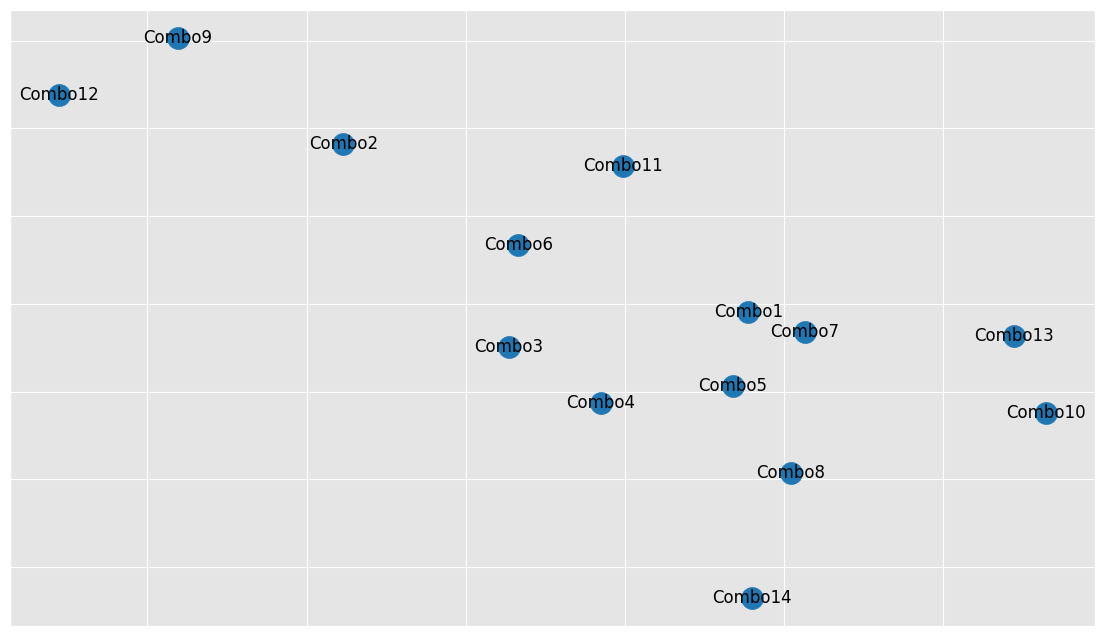

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


X = nx.Graph()
X.add_nodes_from(node_dict.keys())


'''
['fivethirtyeight',
 'seaborn-pastel',
 'seaborn-whitegrid',
 'ggplot',
 'grayscale']
 https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
'''
plt.style.use('ggplot')
plt.figure(figsize=(14,8))

#T = nx.minimum_spanning_tree(X)
nx.draw_networkx(X, node_dict, node_labels, node_size = 250, width=3, edge_color = 'grey')
nx.draw_networkx_labels(X, node_dict,node_labels)
#nx.draw(T, node_dict, with_labels = True)
#plt.show()

In [ ]:
#import map_star as mapstar
#mapstar.map_make_startopo(compress_data)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=5)
clustering.fit(X_2d)
clustering.labels_

array([0, 1, 0, 0, 0, 1, 0, 3, 2, 4, 1, 2, 4, 3])

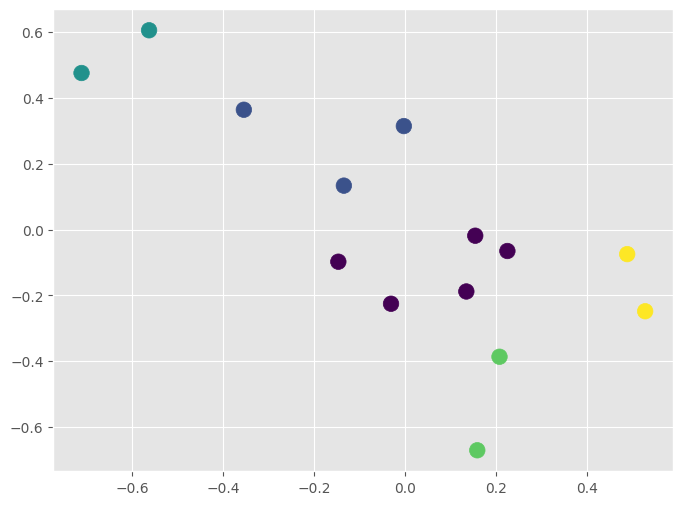

In [ ]:
x, y = X_2d.T
plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.scatter(x, y, s=125, c=clustering.labels_.astype(float))
plt.show()

In [ ]:
node_labels

OrderedDict()

In [ ]:
combo_mac

OrderedDict([('00B8C2D810A2', 'Combo4'),
             ('00f620736c8f', 'Combo13'),
             ('00f6207af8b4', 'Combo3'),
             ('30fd38a4c46f', 'Combo10'),
             ('689a8731fc6b', 'Combo2'),
             ('7cd95c14983f', 'Combo7'),
             ('7cd95c216920', 'Combo8'),
             ('ac67841c5beb', 'Combo6'),
             ('ccf735202154', 'Combo11'),
             ('d88c79432998', 'Combo12'),
             ('e4f0421e25cd', 'Combo9')])

In [ ]:
# generating labels for nodes in the x-y scatter plot
text_list = []

mac_combo = {v: k for k, v in combo_mac.items()}

for i in range(combo_result):
  if len(assign_dict.keys())<5:
    if 'Combo'+str(i+1) not in assign_dict:
      text_list.append('signa'+str(i+1))
    else:
      text_list.append('signa'+str(i+1)+':'+'\n'+assign_dict['Combo'+str(i+1)])
  else:
    if 'Combo'+str(i+1) not in mac_combo:
      text_list.append('signa'+str(i+1))
    else:
      text_list.append('signa'+str(i+1)+':'+'\n'+mac_combo['Combo'+str(i+1)])


In [ ]:
text_list

['signa1',
 'signa2:\n689a8731fc6b',
 'signa3:\n00f6207af8b4',
 'signa4:\n00B8C2D810A2',
 'signa5',
 'signa6:\nac67841c5beb',
 'signa7:\n7cd95c14983f',
 'signa8:\n7cd95c216920',
 'signa9:\ne4f0421e25cd',
 'signa10:\n30fd38a4c46f',
 'signa11:\nccf735202154',
 'signa12:\nd88c79432998',
 'signa13:\n00f620736c8f',
 'signa14']

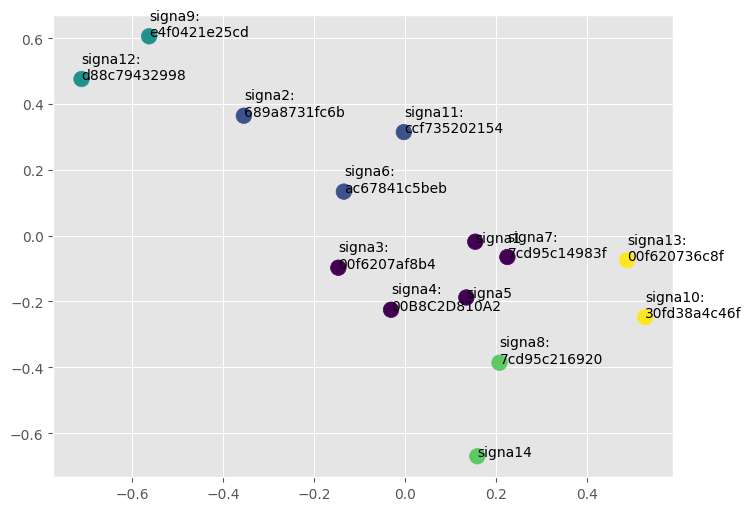

In [ ]:
x, y = X_2d.T
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x, y, s=125, c=clustering.labels_.astype(float))
for i, txt in enumerate(text_list):
  ax.annotate(txt, (x[i], y[i]))


plt.show()

In [ ]:
text_list


['signa1',
 'signa2:\n689a8731fc6b',
 'signa3:\n00f6207af8b4',
 'signa4:\n00B8C2D810A2',
 'signa5',
 'signa6:\nac67841c5beb',
 'signa7:\n7cd95c14983f',
 'signa8:\n7cd95c216920',
 'signa9:\ne4f0421e25cd',
 'signa10:\n30fd38a4c46f',
 'signa11:\nccf735202154',
 'signa12:\nd88c79432998',
 'signa13:\n00f620736c8f',
 'signa14']

This is to be drawn
This is to be drawn
This is to be drawn
This is to be drawn
This is to be drawn
This is to be drawn
This is to be drawn
This is to be drawn
This is to be drawn
This is to be drawn
This is to be drawn


<Figure size 640x480 with 0 Axes>

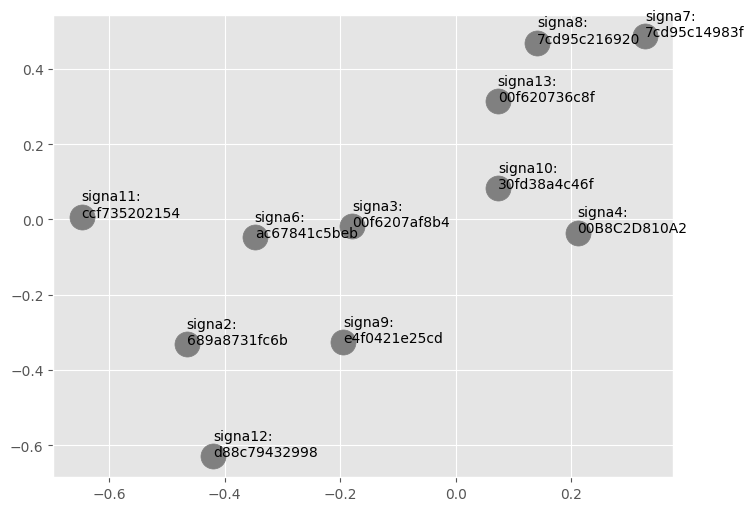

In [ ]:
plt.figure()
x, y = X_2d.T
fig, ax = plt.subplots(figsize=(8,6))
#ax.scatter(x, y, s=125, c=clustering.labels_.astype(float))
for i, txt in enumerate(text_list):
  if clustering.labels_[i] == 0:
    color = 'magenta'
  elif clustering.labels_[i] == 1:
    color = 'red'
  elif clustering.labels_[i] == 2:
    color = 'green'
  elif clustering.labels_[i] == 3:
    color = 'purple'
  elif clustering.labels_[i] == 4:
    color = 'brown'
  if 'CP' in txt:
    print('This is to be drawn')
    ax.scatter(x[i],y[i], s=625, c=color)
    ax.annotate(txt, (x[i], y[i]))
  color = 'grey'
  if ':' in txt:
    print('This is to be drawn')
    ax.scatter(x[i],y[i], s=325, c=color)
    ax.annotate(txt, (x[i], y[i]))

Things to do : 1) run the assigner with both MIP and custom, and see when they converge to each other. Right now, 18 is when they match. That could be the optimum
2) run the MDS for its error and see which numbers gives the lowest error. Right now its 14.
3) What if I only select combos that have been selected by the assigner, and let everything else fall away

Device specific code

<Figure size 640x480 with 0 Axes>

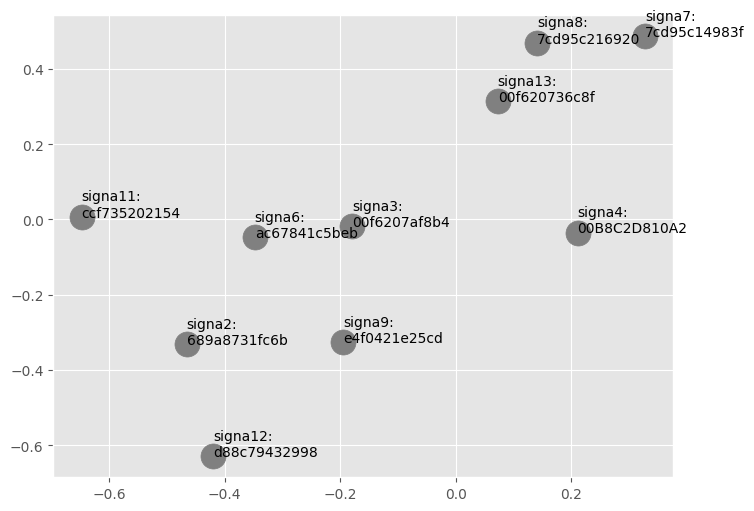

In [ ]:
plt.figure()
x, y = X_2d.T
fig, ax = plt.subplots(figsize=(8,6))
#ax.scatter(x, y, s=125, c=clustering.labels_.astype(float))
for i, txt in enumerate(text_list):
  if clustering.labels_[i] == 0:
    color = 'magenta'
  elif clustering.labels_[i] == 1:
    color = 'red'
  elif clustering.labels_[i] == 2:
    color = 'green'
  elif clustering.labels_[i] == 3:
    color = 'purple'
  elif clustering.labels_[i] == 4:
    color = 'brown'
  if 'CP' in txt:
    print('This is to be drawn')
    ax.scatter(x[i],y[i], s=625, c=color)
    ax.annotate(txt, (x[i], y[i]))
  color = 'grey'
  if 'signa10' in txt:
    continue
  if ':' in txt:
    #print('This is to be drawn')
    ax.scatter(x[i],y[i], s=325, c=color)
    ax.annotate(txt, (x[i], y[i]))

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
# distance between rows of X
E = euclidean_distances(X_2d, X_2d)

#print(E)

print([14,[1,5,10]])   # subtract one from all combos numbers

print(np.sum(E[2,[10,5,1]]))
print(np.sum(E[8,[10,5,1]]))
print(np.sum(E[11,[10,5,1]]))

[14, [1, 5, 10]]
1.0649179896806549
1.1512274943316847
1.5621095706331958


In [ ]:
#@title Device specific
# Specific to a system
# generating labels for nodes in the x-y scatter plot

text_list = []
for i in range(combo_result):
  if 'Combo'+str(i+1) not in assign_dict:
    text_list.append('signa'+str(i+1))
  else:
    if '3886f' in assign_dict['Combo'+str(i+1)]:
      text_list.append('s'+str(i+1)+' Nest'+':'+'\n'+assign_dict['Combo'+str(i+1)])
    elif 'f0ef' in assign_dict['Combo'+str(i+1)]:
      text_list.append('s'+str(i+1)+' G-Mini'+':'+'\n'+assign_dict['Combo'+str(i+1)])
    elif 'CP2' in assign_dict['Combo'+str(i+1)]:
      text_list.append('s'+str(i+1)+' AP'+':'+'\n'+assign_dict['Combo'+str(i+1)])
    elif 'f854' in assign_dict['Combo'+str(i+1)]:
      text_list.append('s'+str(i+1)+' Alexa'+':'+'\n'+assign_dict['Combo'+str(i+1)])
    elif '704' in assign_dict['Combo'+str(i+1)]:
      text_list.append('s'+str(i+1)+' Plug'+':'+'\n'+assign_dict['Combo'+str(i+1)])
    elif '0023' in assign_dict['Combo'+str(i+1)]:
      text_list.append('s'+str(i+1)+' Laptop'+':'+'\n'+assign_dict['Combo'+str(i+1)])
    elif '20c' in assign_dict['Combo'+str(i+1)]:
      text_list.append('s'+str(i+1)+' Desktop'+':'+'\n'+assign_dict['Combo'+str(i+1)])
    else:
      pass

print(text_list)

['signa1', 'signa4', 'signa5', 'signa7', 'signa13', 'signa16', 'signa17', 'signa18']
